In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592280015&Signature=BoM9%2B6UsyPfi5GE8IYHM%2FwoLUjXLAJuFEe88FhMAp%2F5lJqujgy%2BLH4ikpeYjhty06EhUMuQ9qd%2BPgJ5gZYcCEKYlKLra2mnYIHZLN93vQZiu3hcso5VCQkQojPf3L5%2FZH6svIPm9M8XLUkpJsOSM2BJ3hP65QlcYK%2BY9OSNH4X7iqs54xUDMZwYDHIf7csS6HJ4Jjw8q7qlR3EKmHkjHZfotofBThmauTzX5hPOzYkMvrgtIu1RcMNcJS68DOyQqOfY1rXrRJD83ZGcO46a85V0vw3bUjsXPE5sQ2g%2BTyIyEhgPdXfbnwC67vY9HiKwFFwLgwGe3PfNyaDYZYP%2B9%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip" -c -O 'train.zip'

--2020-06-13 08:43:53--  https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592280015&Signature=BoM9%2B6UsyPfi5GE8IYHM%2FwoLUjXLAJuFEe88FhMAp%2F5lJqujgy%2BLH4ikpeYjhty06EhUMuQ9qd%2BPgJ5gZYcCEKYlKLra2mnYIHZLN93vQZiu3hcso5VCQkQojPf3L5%2FZH6svIPm9M8XLUkpJsOSM2BJ3hP65QlcYK%2BY9OSNH4X7iqs54xUDMZwYDHIf7csS6HJ4Jjw8q7qlR3EKmHkjHZfotofBThmauTzX5hPOzYkMvrgtIu1RcMNcJS68DOyQqOfY1rXrRJD83ZGcO46a85V0vw3bUjsXPE5sQ2g%2BTyIyEhgPdXfbnwC67vY9HiKwFFwLgwGe3PfNyaDYZYP%2B9%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 543.16M   167

In [2]:
!7z x train.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 569546721 bytes (544 MiB)

Extracting archive: train.zip
 16% 4096 Open              --
Path = train.zip
Type = zip
Physical Size = 569546721

  0%    
Would you like to replace the existing file:
  Path:     ./train/cat.0.jpg
  Size:     12414 bytes (13 KiB)
  Modified: 2013-09-20 10:05:42
with the file from archive:
  Path:     train/cat.0.jpg
  Size:     12414 bytes (13 KiB)
  Modified: 2013-09-20 10:05:42
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? N

  0% 1      
Would you like to replace the existing file:
  Path:     ./train/cat.1.jpg
  Size:     16880 bytes (17 KiB)
  Modified: 2013-09-20 10:05:42
with the file from archive:
  Path:    

In [0]:
import cv2
import os
import shutil
import numpy as np
import sys

In [0]:
training_size = 1500; testing_size = 500
train_images = []; train_labels = []
test_images = []; test_labels = []
dog_images = []; dog_labels = []
cat_images = []; cat_labels = []
filename = []

In [6]:
for i in os.listdir('train/'):
    if 'cat' in i:
        cat_labels.append('cat')
    elif 'dog' in i:
        dog_labels.append('dog')
    filename.append(i)
print(len(cat_labels))
print(len(dog_labels))

12500
12500


In [7]:
filename[:10]

['dog.1018.jpg',
 'cat.3005.jpg',
 'dog.5561.jpg',
 'cat.9000.jpg',
 'cat.2559.jpg',
 'dog.3451.jpg',
 'dog.6646.jpg',
 'cat.10512.jpg',
 'dog.9415.jpg',
 'dog.11932.jpg']

In [0]:
def load_images_from_folder(folder, filename, type='dog'):
    images = []
    for file in filename:
        if type in file:
            img = cv2.imread(os.path.join(folder,file))
            if img is not None:
                images.append(img) 
    return images

In [0]:
cat_images = load_images_from_folder('train', filename, type='cat')
dog_images = load_images_from_folder('train', filename, type='dog')

In [10]:
print(len(cat_images))
print(len(dog_images))

12500
12500


In [0]:
import matplotlib.pyplot as plt

Image  0  for cat
Shape (74, 81, 3)
cat


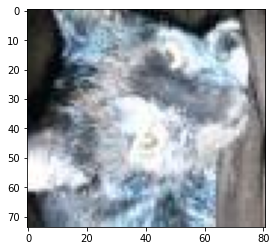

Image  0  for dog
Shape (375, 499, 3)
dog


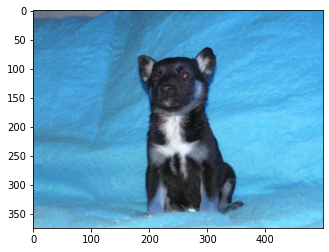

Image  1  for cat
Shape (500, 398, 3)
cat


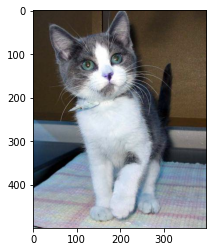

Image  1  for dog
Shape (349, 500, 3)
dog


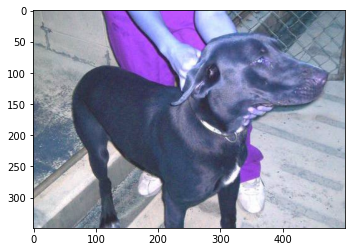

Image  2  for cat
Shape (223, 320, 3)
cat


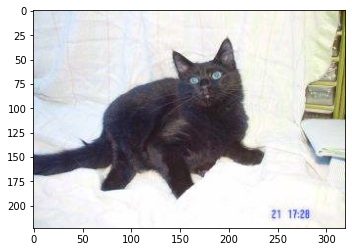

Image  2  for dog
Shape (302, 359, 3)
dog


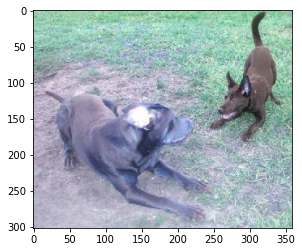

Image  3  for cat
Shape (390, 336, 3)
cat


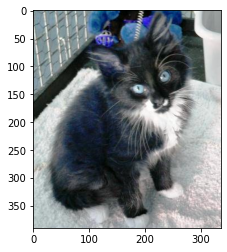

Image  3  for dog
Shape (474, 375, 3)
dog


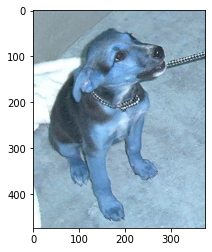

Image  4  for cat
Shape (500, 374, 3)
cat


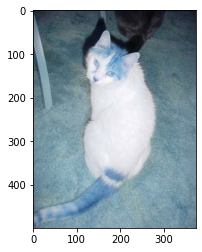

Image  4  for dog
Shape (499, 412, 3)
dog


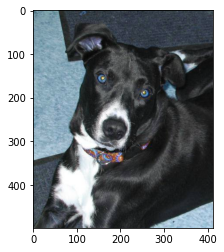

In [12]:
for i in range(5):
    num = np.random.randint(0, len(cat_images))
    print('Image ',i,' for cat')
    print('Shape',cat_images[num].shape)
    print(cat_labels[num])
    plt.imshow(cat_images[num])
    plt.show()
    print('Image ',i,' for dog')
    print('Shape',dog_images[num].shape)
    print(dog_labels[num])
    plt.imshow(dog_images[num])
    plt.show()

In [0]:
# We will consider 3000 images for train and 1000 images for test

In [14]:
for i in range(training_size):
    num = np.random.randint(0, len(cat_labels)/2)
    train_images.append(cat_images[num])
    train_images.append(dog_images[num])
    train_labels.append(cat_labels[num])
    train_labels.append(dog_labels[num])
print(len(train_images))
print(len(train_labels))

3000
3000


In [15]:
for i in range(testing_size):
    num = np.random.randint(len(cat_labels)/2, len(cat_labels))
    test_images.append(cat_images[num])
    test_images.append(dog_images[num])
    test_labels.append(cat_labels[num])
    test_labels.append(dog_labels[num])
print(len(test_images))
print(len(test_labels))

1000
1000


Image  0  from train
Shape (336, 447, 3)
cat


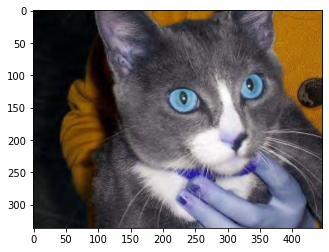

Image  0  from test
Shape (334, 377, 3)
cat


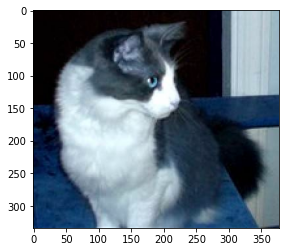

Image  1  from train
Shape (374, 499, 3)
dog


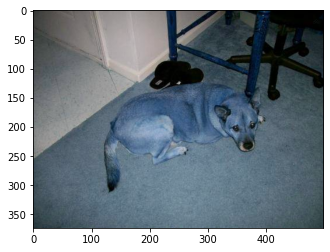

Image  1  from test
Shape (210, 299, 3)
dog


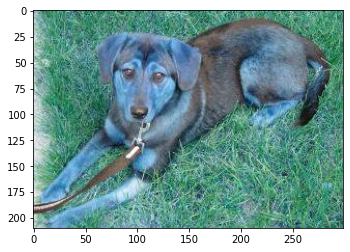

Image  2  from train
Shape (374, 500, 3)
cat


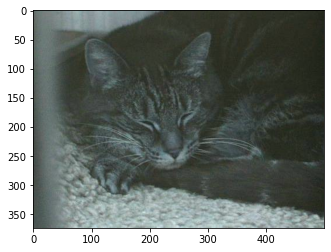

Image  2  from test
Shape (375, 499, 3)
cat


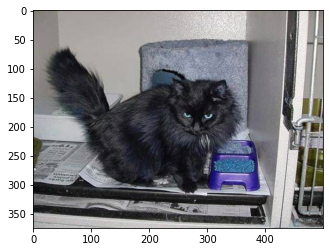

Image  3  from train
Shape (425, 419, 3)
cat


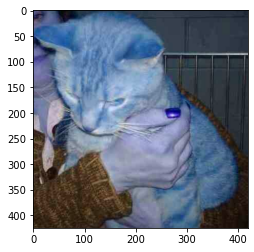

Image  3  from test
Shape (239, 320, 3)
cat


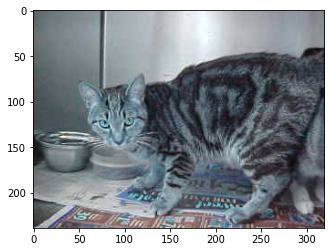

Image  4  from train
Shape (374, 500, 3)
dog


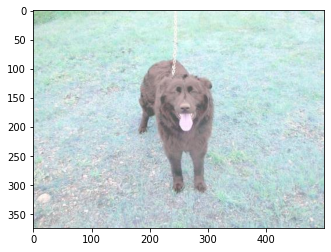

Image  4  from test
Shape (269, 360, 3)
dog


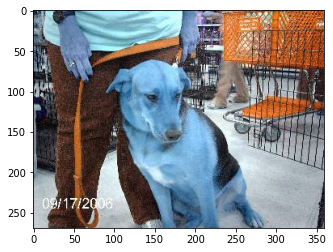

In [16]:
for i in range(5):
    num = np.random.randint(0, testing_size)
    print('Image ',i,' from train')
    print('Shape',train_images[num].shape)
    print(train_labels[num])
    plt.imshow(train_images[num])
    plt.show()
    print('Image ',i,' from test')
    print('Shape',test_images[num].shape)
    print(test_labels[num])
    plt.imshow(test_images[num])
    plt.show()

In [0]:
train = []
test = []

In [0]:
for image in train_images:
    train.append(cv2.resize(image, (150,150)))

In [0]:
for image in test_images:
    test.append(cv2.resize(image, (150,150)))

In [20]:
train[1].shape

(150, 150, 3)

In [0]:
import joblib
#joblib.dump(train, 'train.pkl')
#joblib.dump(test, 'test.pkl')
train_data = joblib.load('train.pkl')
test_data = joblib.load('test.pkl')

In [4]:
print(len(train_data))
print(len(test_data))

3000
1000


In [0]:
y_tr = []; y_te = []
for i in train_labels:
    if i=='cat':
        y_tr.append(1)
    else:
        y_tr.append(0)
for i in test_labels:
    if i=='cat':
        y_te.append(1)
    else:
        y_te.append(0)

In [5]:
print(len(y_tr))
len(y_te)

3000


1000

In [0]:
import joblib
#joblib.dump(y_tr, 'y_train.pkl')
#joblib.dump(y_te, 'y_test.pkl')
y_tr = joblib.load('y_train.pkl')
y_te = joblib.load('y_test.pkl')

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [7]:
train_data = np.array(train_data)
test_data = np.array(test_data)
print(train_data.shape)
print(test_data.shape)

(3000, 150, 150, 3)
(1000, 150, 150, 3)


In [0]:
train_data = train_data/255
test_data = test_data/255

In [46]:
y_train = np.array(y_tr)
y_test = np.array(y_te)
print(y_train.shape)
print(y_test.shape)

(3000,)
(1000,)


In [0]:
batch_size = 32
epochs = 50
input_shape = train_data.shape[1:]

In [51]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = input_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_56 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 144, 144, 64)      51264     
_________________________________________________________________
activation_57 (Activation)   (None, 144, 144, 64)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 70, 70, 32)        18464     
_________________________________________________________________
activation_58 (Activation)   (None, 70, 70, 32)      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

In [53]:
history = model.fit(train_data, y_train, batch_size=32, epochs = 20, validation_data=(test_data, y_test))

Epoch 1/20
94/94 [==============================] - 13s 135ms/step - loss: 0.9185 - accuracy: 0.5477 - val_loss: 0.6804 - val_accuracy: 0.5710
Epoch 2/20
94/94 [==============================] - 13s 134ms/step - loss: 0.6672 - accuracy: 0.6390 - val_loss: 0.6180 - val_accuracy: 0.6940
Epoch 3/20
94/94 [==============================] - 13s 134ms/step - loss: 0.5759 - accuracy: 0.7123 - val_loss: 0.6159 - val_accuracy: 0.6630
Epoch 4/20
94/94 [==============================] - 13s 134ms/step - loss: 0.4734 - accuracy: 0.7813 - val_loss: 0.6798 - val_accuracy: 0.6620
Epoch 5/20
94/94 [==============================] - 13s 135ms/step - loss: 0.3638 - accuracy: 0.8323 - val_loss: 0.6852 - val_accuracy: 0.6880
Epoch 6/20
94/94 [==============================] - 13s 135ms/step - loss: 0.2412 - accuracy: 0.8970 - val_loss: 0.8316 - val_accuracy: 0.6880
Epoch 7/20
94/94 [==============================] - 13s 136ms/step - loss: 0.1537 - accuracy: 0.9487 - val_loss: 1.0339 - val_accuracy: 0.6890

In [0]:
import matplotlib.pyplot as plt
epochs = 20
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

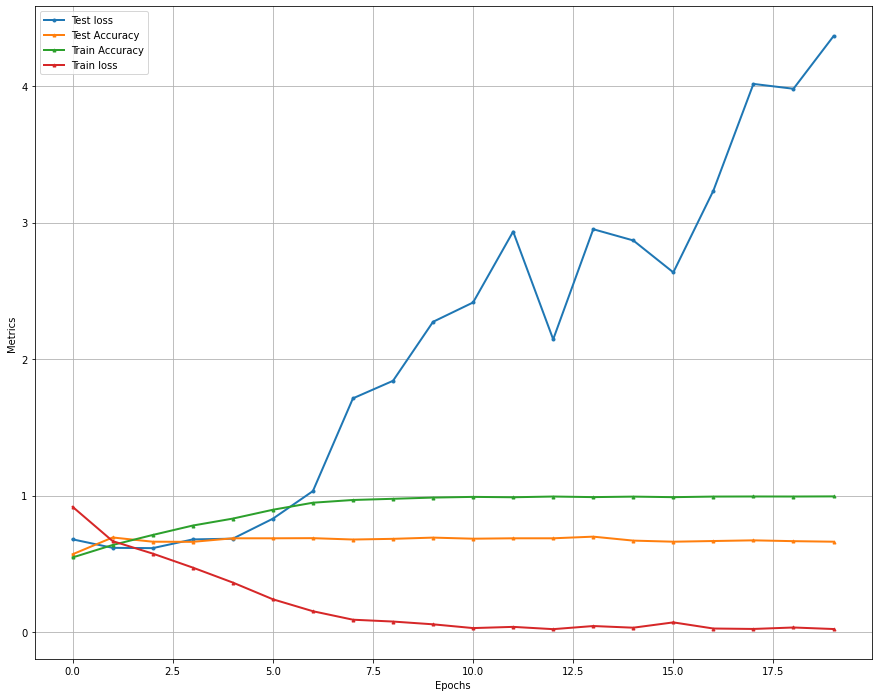

In [70]:
plt.figure(figsize=(15, 12))
plt.plot(range(0,epochs), test_loss, linewidth=2, marker='o', markersize=3, label='Test loss')
plt.plot(range(0,epochs), test_accuracy, linewidth=2, marker='^', markersize=3, label='Test Accuracy')
plt.plot(range(0,epochs), train_accuracy, linewidth=2, marker='^', markersize=3, label='Train Accuracy')
plt.plot(range(0,epochs), train_loss, linewidth=2, marker='^', markersize=3, label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.grid()
plt.legend()
plt.show()

The above model is overfitting, as there is huge difference between the train and test scores. The test performance is very poor compared to the train performance.


# Data Augmentation:-

In [0]:
datagen = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [73]:
history = model.fit(x = datagen.flow(train_data, y_train, batch_size=32), 
                    validation_data = (test_data, y_test),
                    steps_per_epoch = len(train_data)//batch_size, epochs=25)

Epoch 1/25
93/93 [==============================] - 21s 227ms/step - loss: 0.7646 - accuracy: 0.5192 - val_loss: 0.8197 - val_accuracy: 0.5850
Epoch 2/25
93/93 [==============================] - 21s 225ms/step - loss: 0.7191 - accuracy: 0.5603 - val_loss: 0.6860 - val_accuracy: 0.6210
Epoch 3/25
93/93 [==============================] - 21s 226ms/step - loss: 0.6773 - accuracy: 0.6058 - val_loss: 0.6161 - val_accuracy: 0.6860
Epoch 4/25
93/93 [==============================] - 22s 240ms/step - loss: 0.6562 - accuracy: 0.6536 - val_loss: 0.6208 - val_accuracy: 0.6670
Epoch 5/25
93/93 [==============================] - 21s 230ms/step - loss: 0.6308 - accuracy: 0.6644 - val_loss: 0.6262 - val_accuracy: 0.6760
Epoch 6/25
93/93 [==============================] - 21s 230ms/step - loss: 0.6331 - accuracy: 0.6678 - val_loss: 0.5901 - val_accuracy: 0.6810
Epoch 7/25
93/93 [==============================] - 21s 229ms/step - loss: 0.6174 - accuracy: 0.6762 - val_loss: 0.5709 - val_accuracy: 0.7160

In [0]:
import matplotlib.pyplot as plt
epochs = 25
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

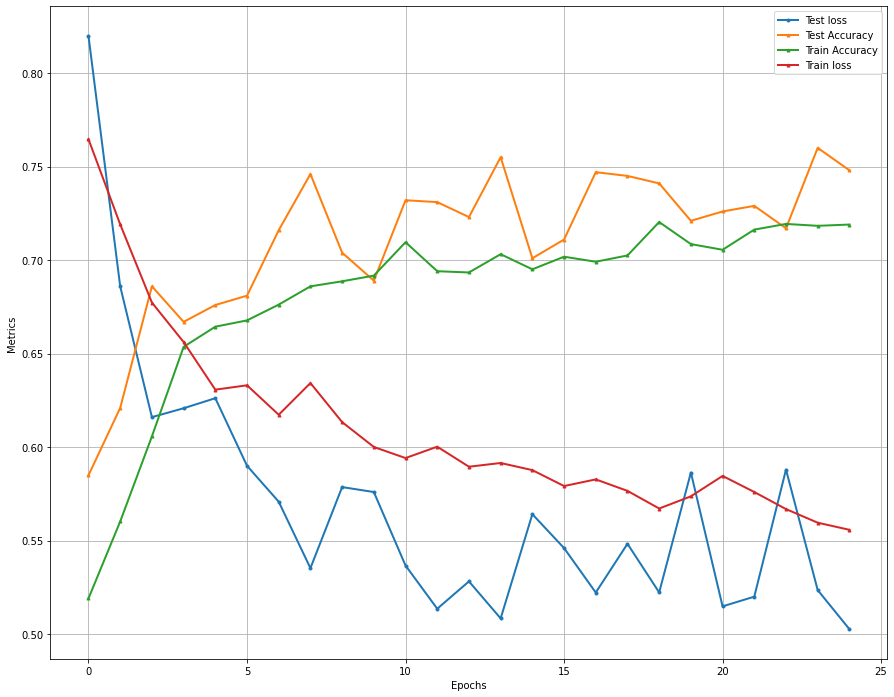

In [77]:
plt.figure(figsize=(15, 12))
plt.plot(range(0,epochs), test_loss, linewidth=2, marker='o', markersize=3, label='Test loss')
plt.plot(range(0,epochs), test_accuracy, linewidth=2, marker='^', markersize=3, label='Test Accuracy')
plt.plot(range(0,epochs), train_accuracy, linewidth=2, marker='^', markersize=3, label='Train Accuracy')
plt.plot(range(0,epochs), train_loss, linewidth=2, marker='^', markersize=3, label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.grid()
plt.legend()
plt.show()

For the above model, after adding new data using the data generator library of keras, the performance has increased on the test data, and the train and test performances are similar which indicates that the model is not overfitiing.